<a href="https://colab.research.google.com/github/ikrishna04/customer_churn_prediction/blob/main/Customer__Churn_Prediction_casestudy_Krishna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# Loading dataset from Google Drive

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
filepath= '/content/drive/MyDrive/Datasets/Training_data.csv'
df_train= pd.read_csv(filepath)
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [88]:
filepath= '/content/drive/MyDrive/Datasets/Testing_data.csv'
df_test= pd.read_csv(filepath)
df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


# Exploratory Data Analysis (EDA)

In [89]:
df_train.shape

(5634, 21)

In [90]:
df_test.shape

(1409, 21)

In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [92]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [93]:
df_train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [94]:
df_test.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1409.000000,1409.000000,1409.000000
mean,0.171753,31.428673,63.898013
std,0.377300,24.322161,30.282693
min,0.000000,0.000000,18.700000
25%,0.000000,8.000000,30.100000
50%,0.000000,27.000000,69.900000
75%,0.000000,54.000000,89.500000
max,1.000000,72.000000,118.600000


## Missing Values Identification

In [95]:
df_train.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [96]:
df_test.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Duplicate Identification

In [97]:
df_train.duplicated().sum()

np.int64(0)

In [98]:
df_test.duplicated().sum()

np.int64(0)

In [99]:
df_train.nunique()

,0
customerID,5634
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [100]:
df_test.nunique()

,0
customerID,1409
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


## Outlier Identification

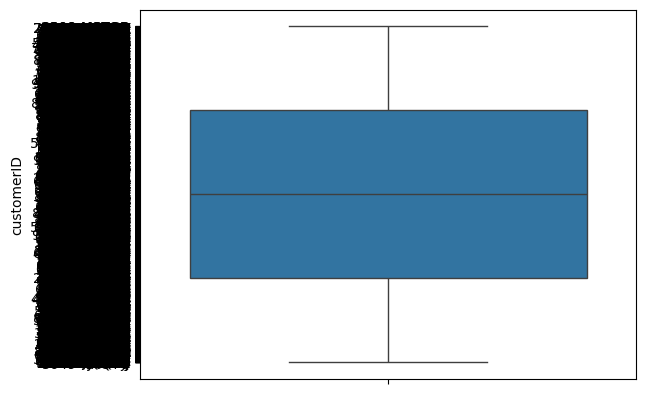

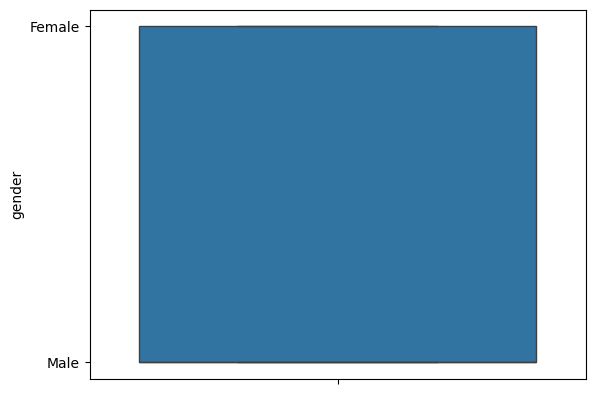

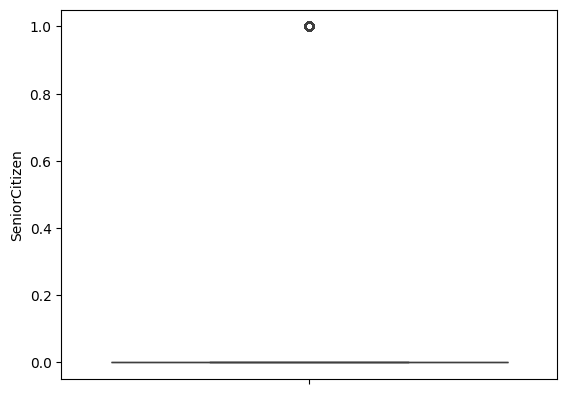

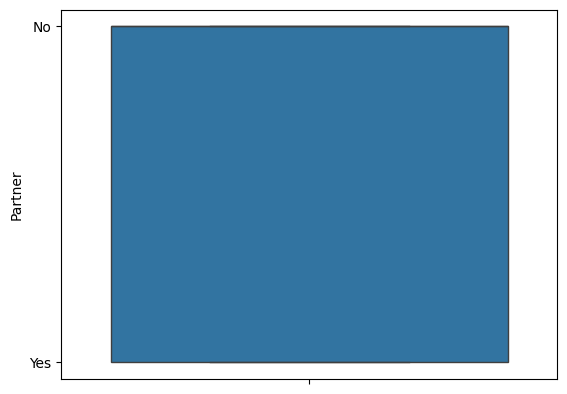

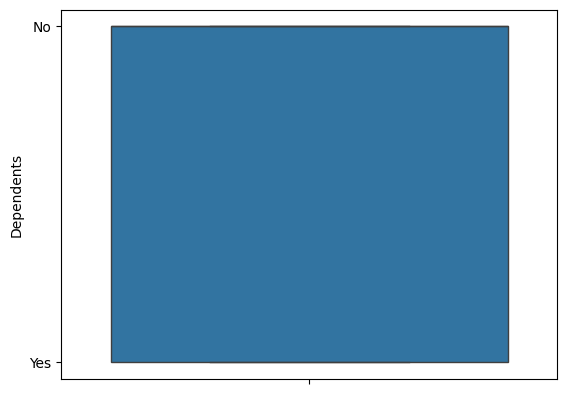

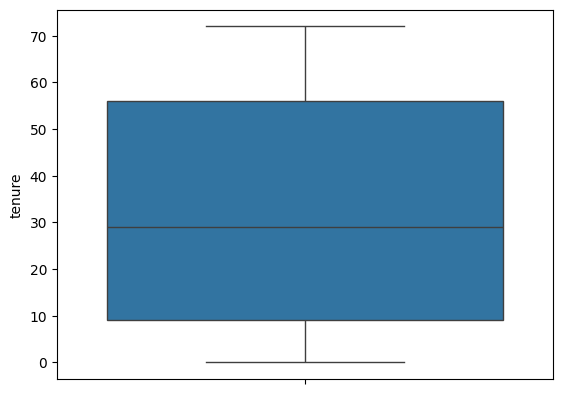

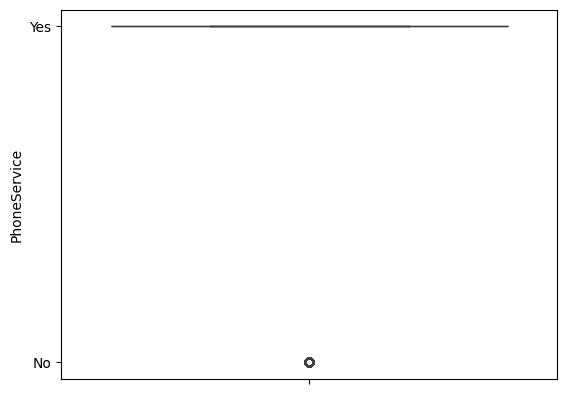

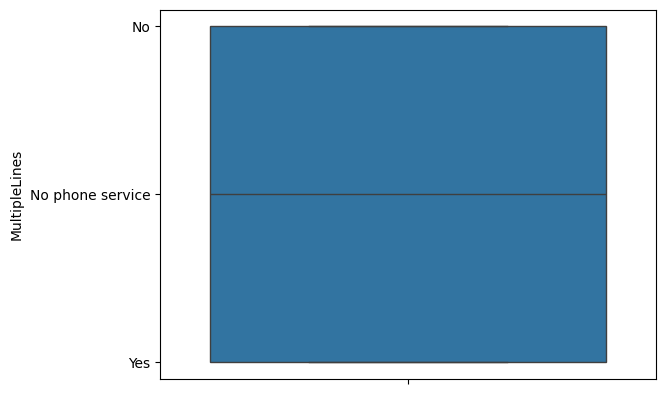

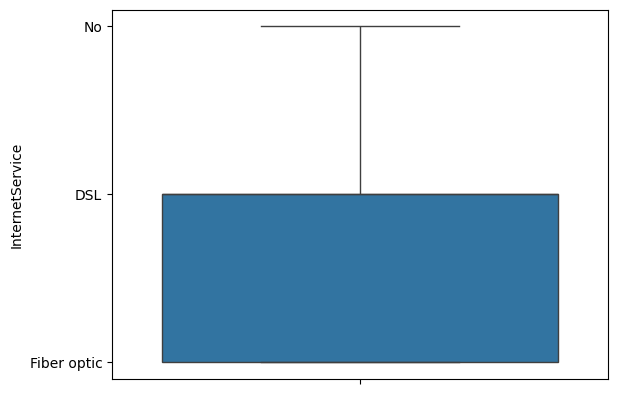

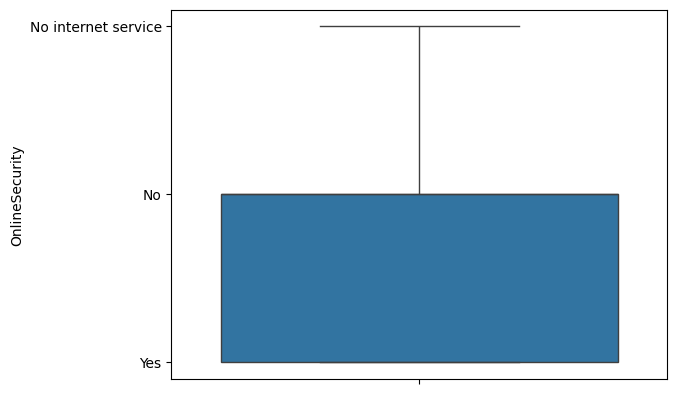

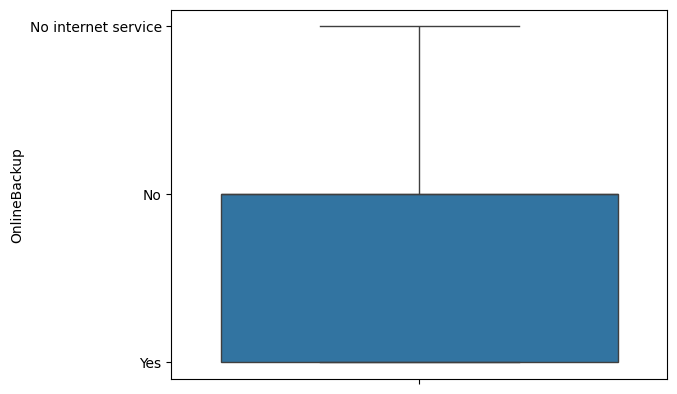

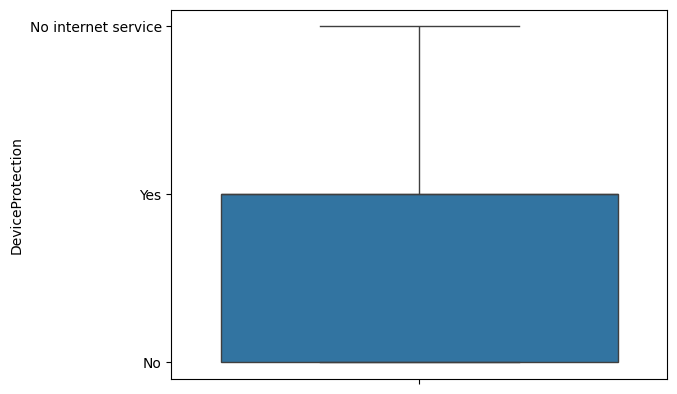

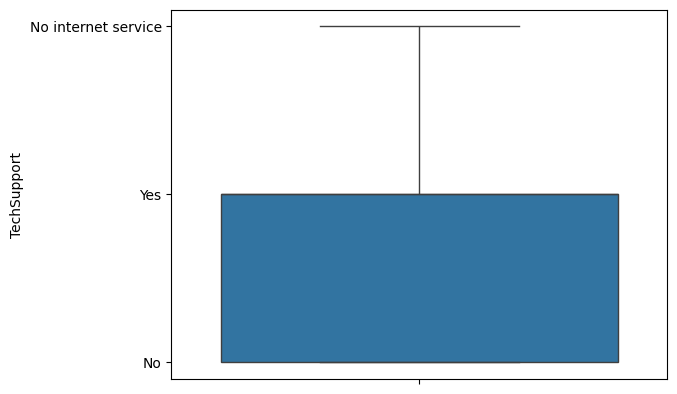

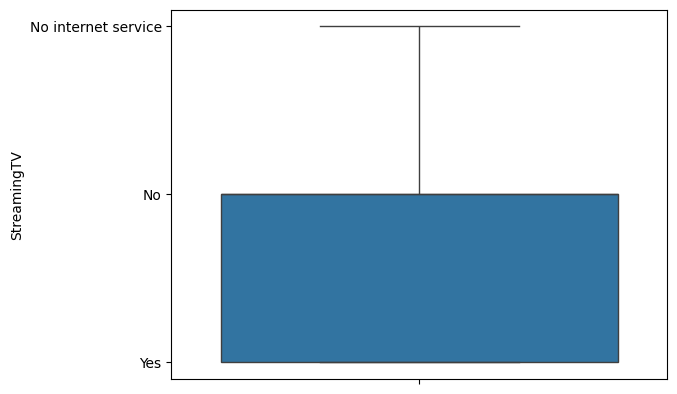

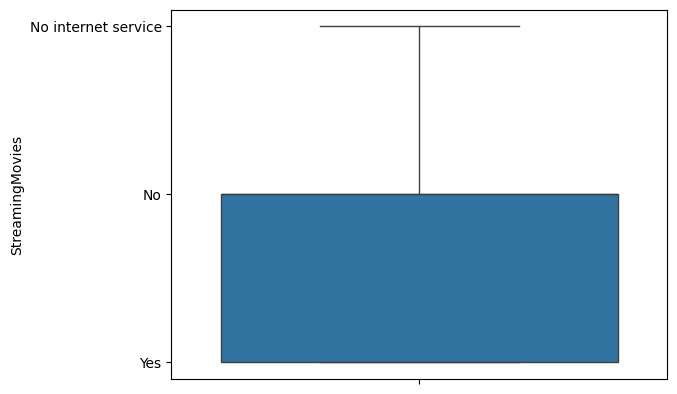

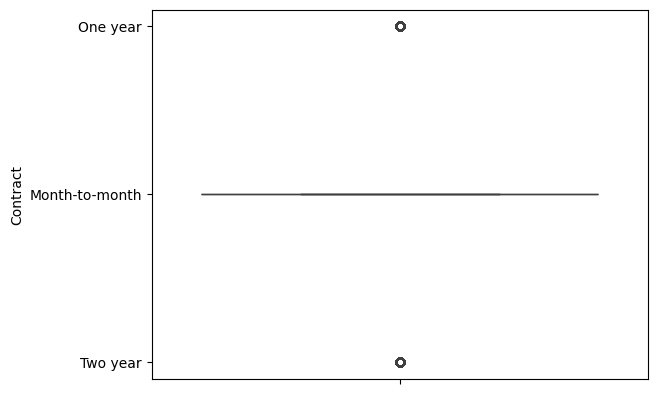

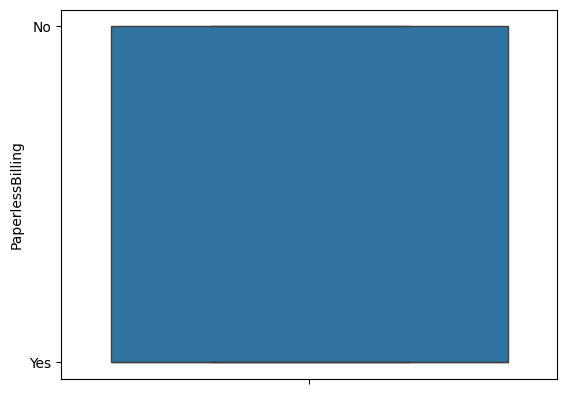

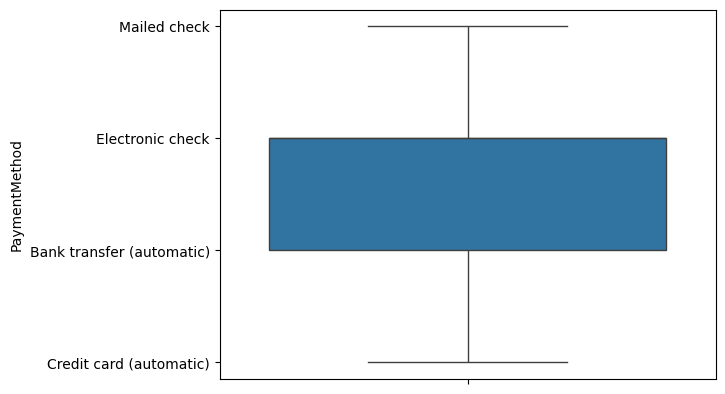

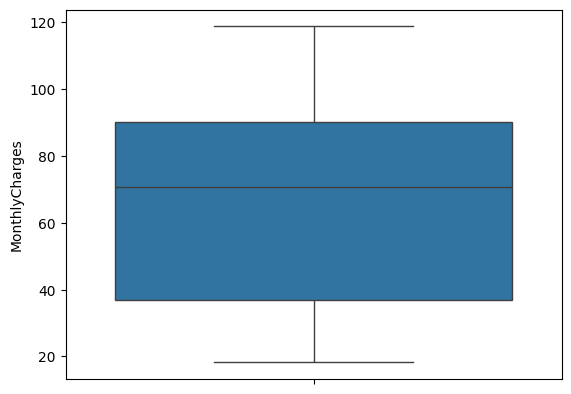

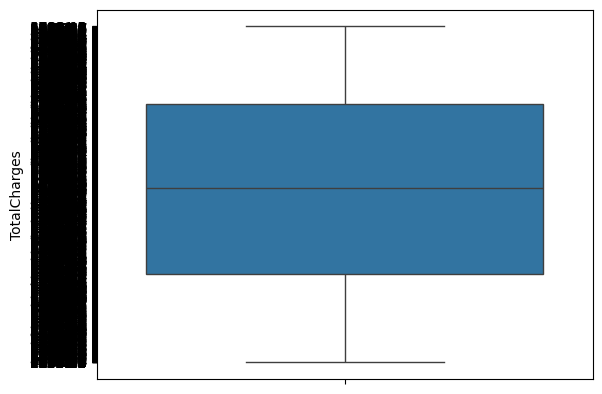

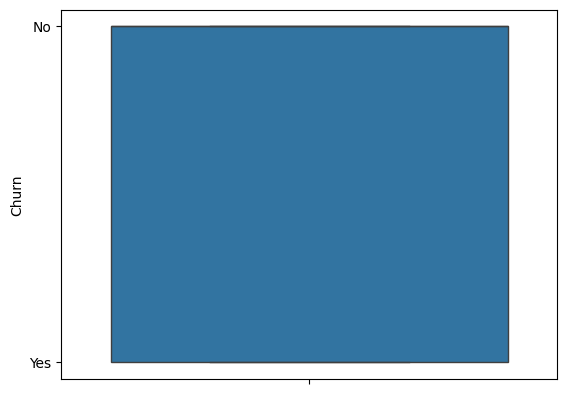

In [101]:
for col in df_train.columns:
  sns.boxplot(df_train[col])
  plt.show()

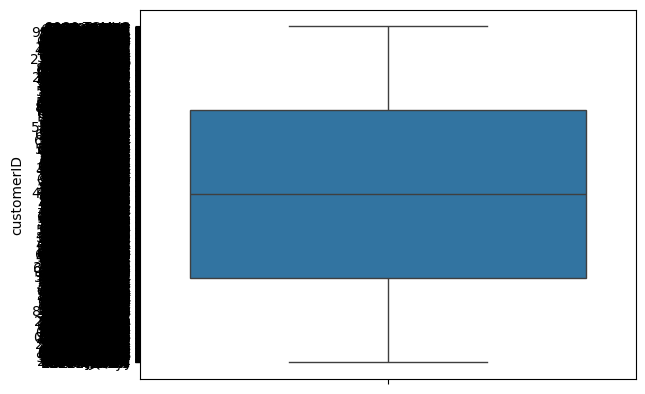

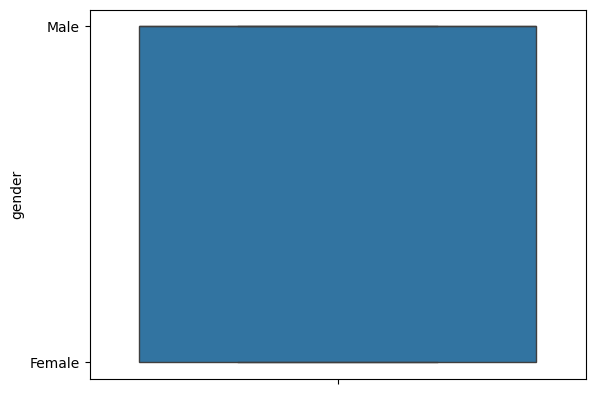

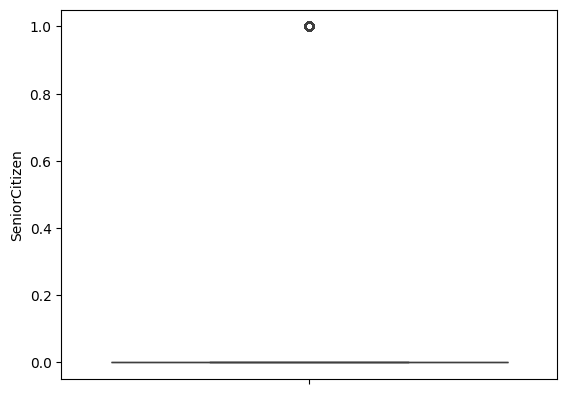

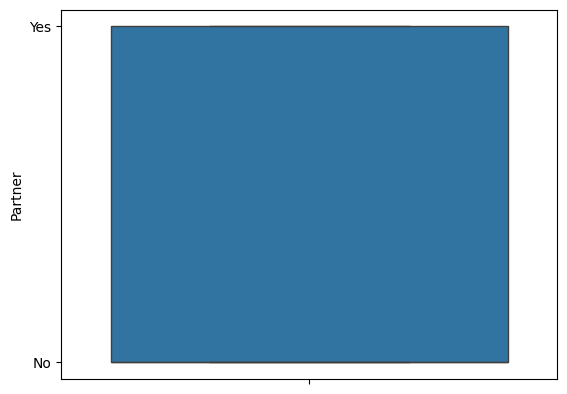

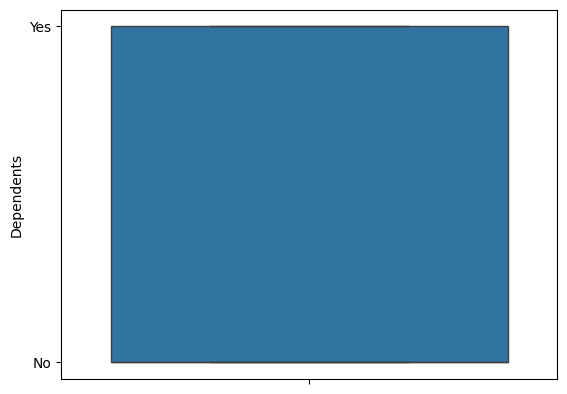

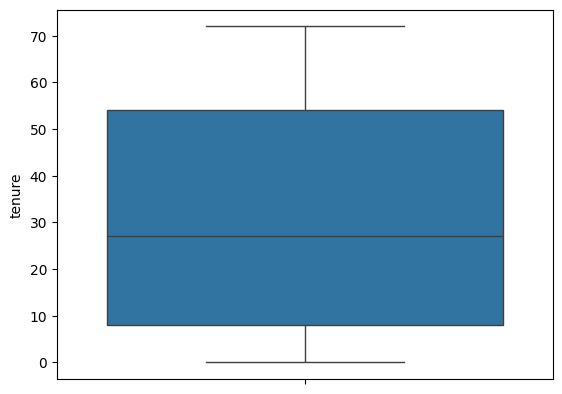

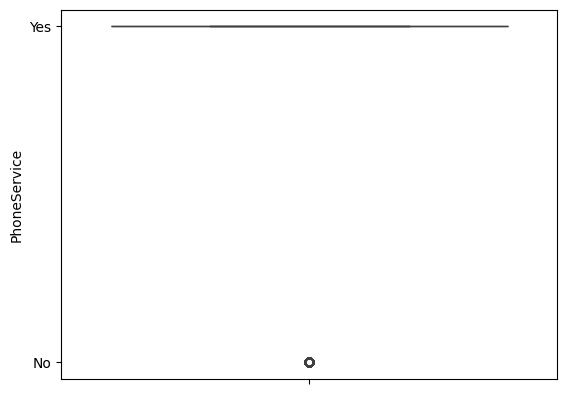

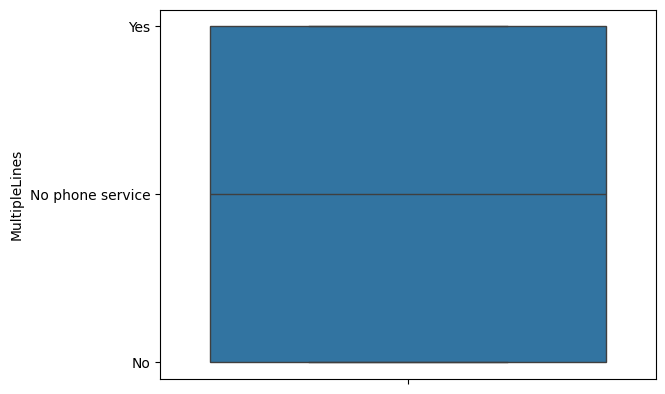

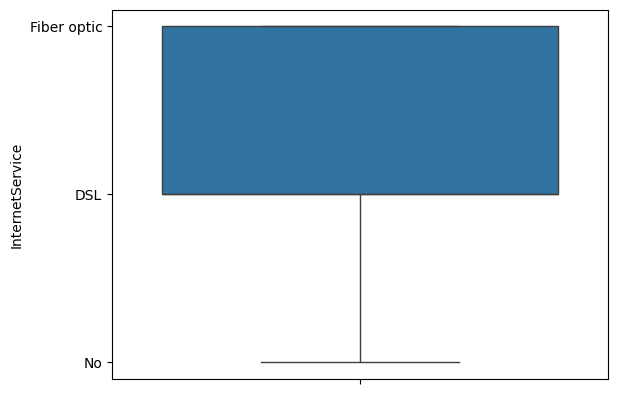

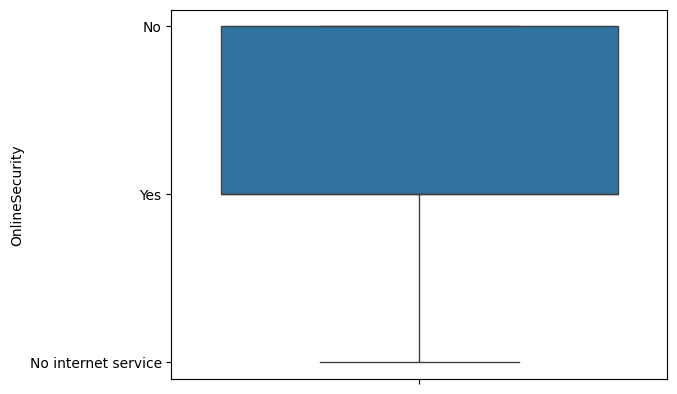

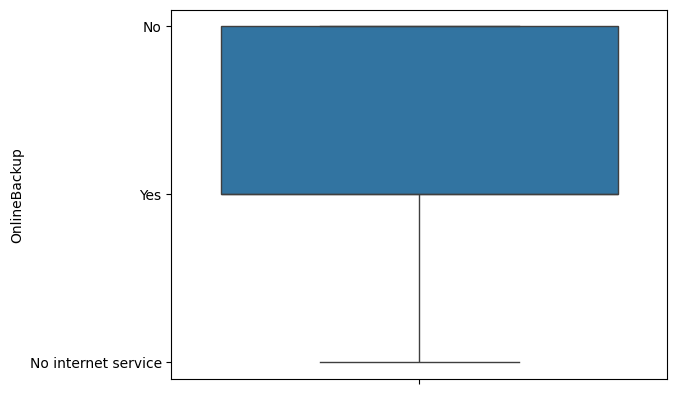

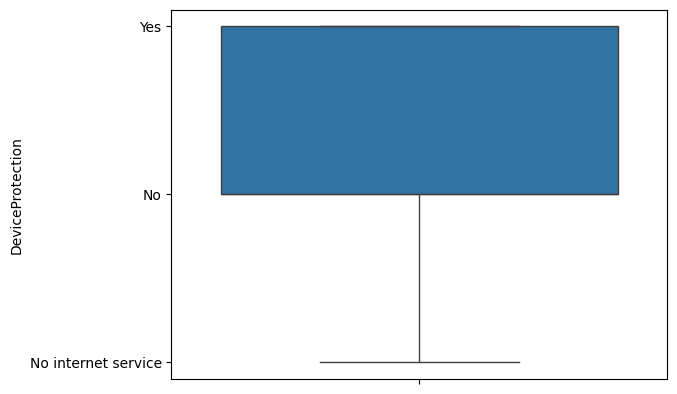

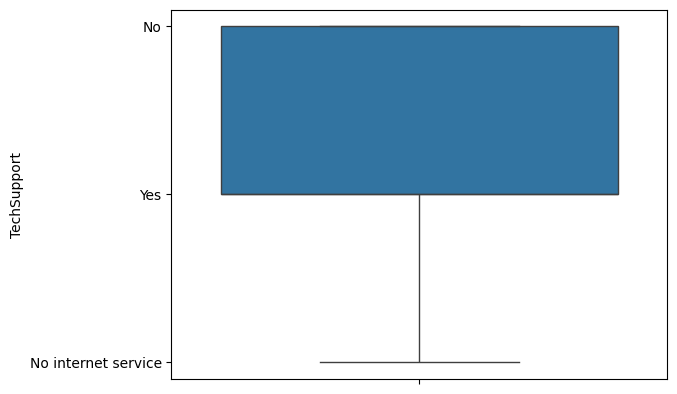

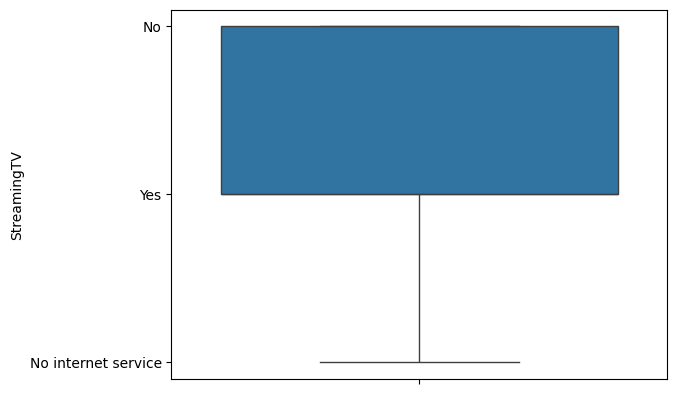

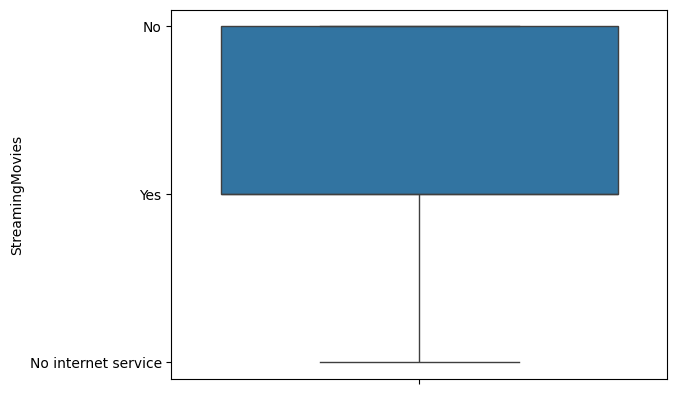

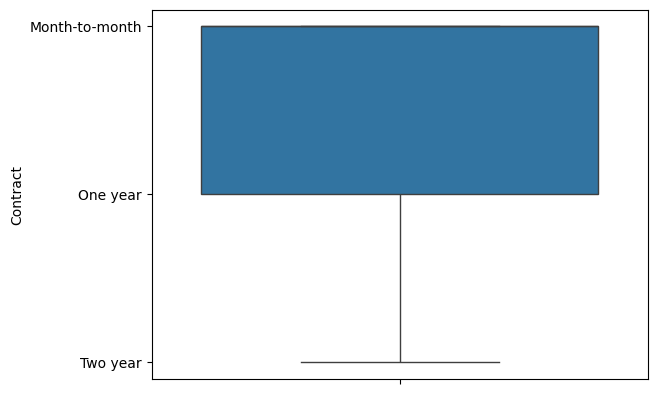

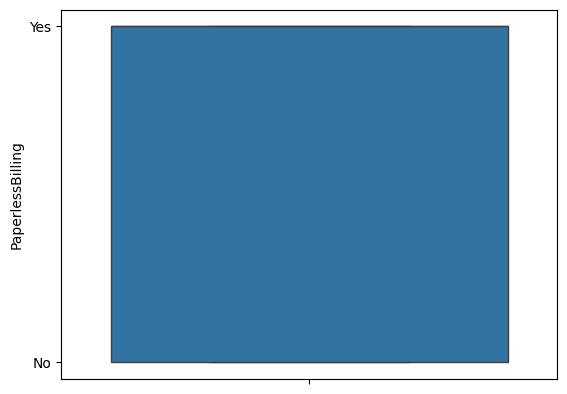

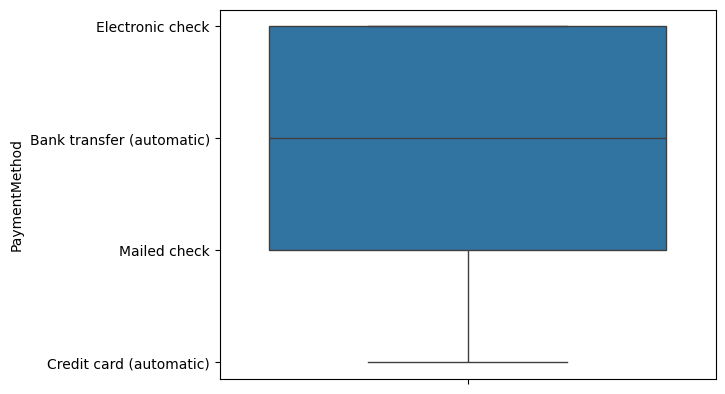

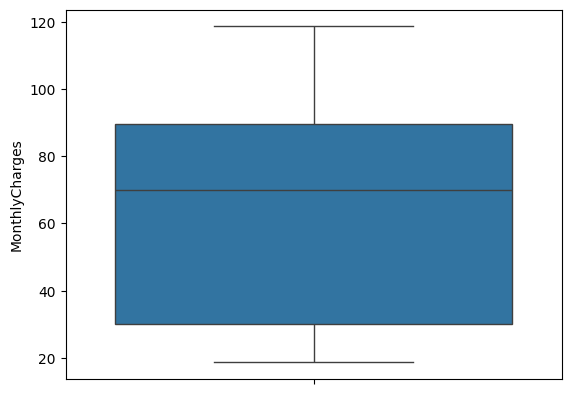

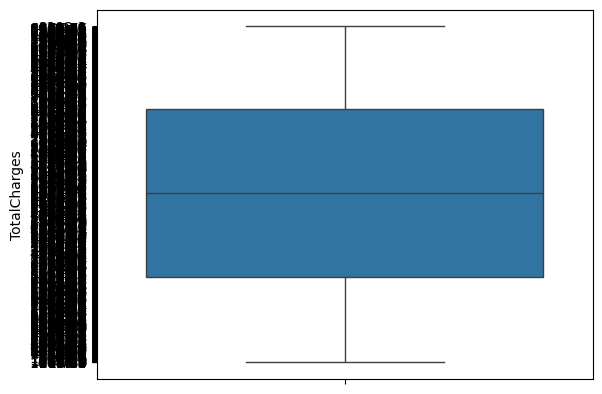

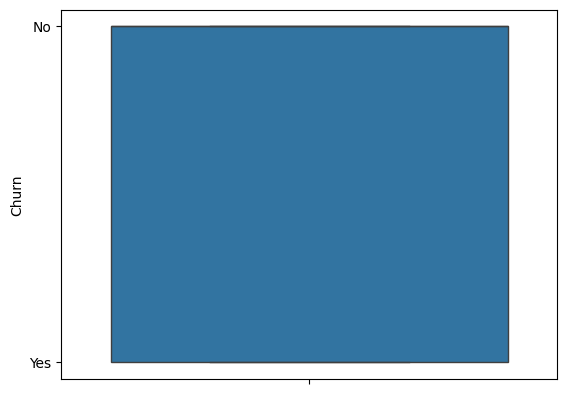

In [102]:
for col in df_test.columns:
  sns.boxplot(df_test[col])
  plt.show()

## Visualization

Scatterplot

Text(0.5, 1.0, 'TotalChargess vs Churns')

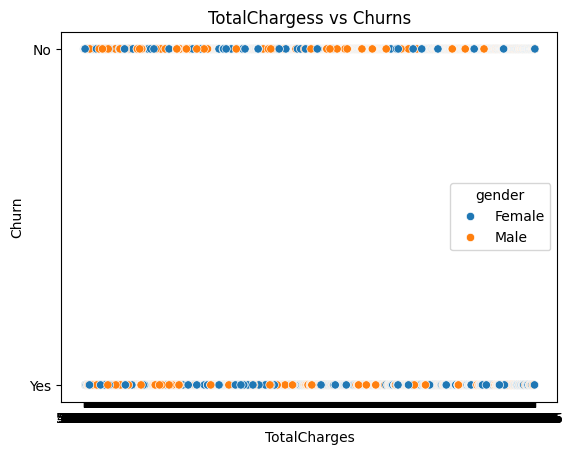

In [103]:

sns.scatterplot(data = df_train, x = 'TotalCharges', y = 'Churn',hue="gender")
plt.title("TotalChargess vs Churns")

Text(0.5, 1.0, 'TotalChargess vs Churns')

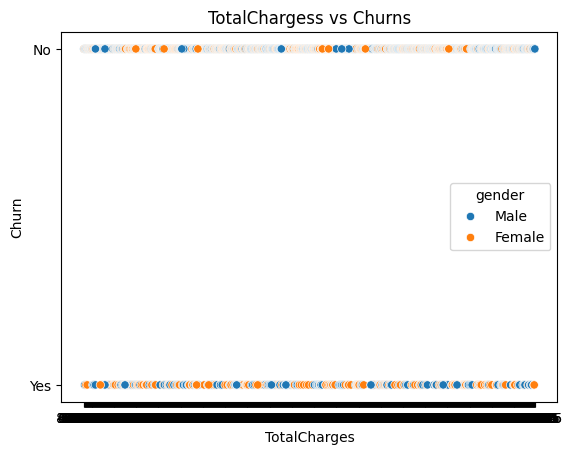

In [104]:
sns.scatterplot(data = df_test, x = 'TotalCharges', y = 'Churn',hue="gender")
plt.title("TotalChargess vs Churns")

Histogram

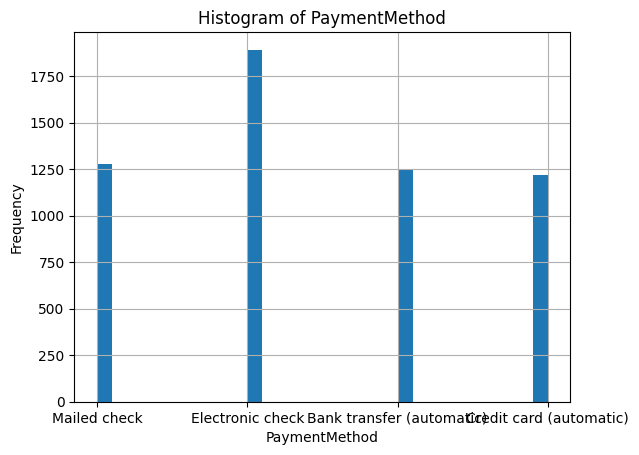

In [105]:
df_train['PaymentMethod'].hist(bins=30)
plt.title('Histogram of PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Frequency')
plt.show()

kdeplot

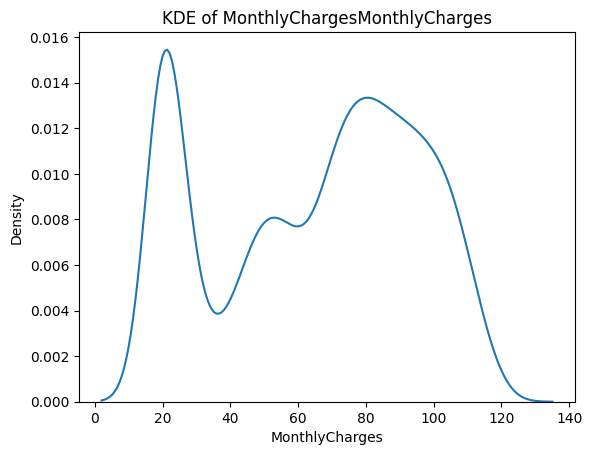

In [106]:
sns.kdeplot(df_train ['MonthlyCharges'].dropna())
plt.title('KDE of MonthlyChargesMonthlyCharges')
plt.show()

Pairplot

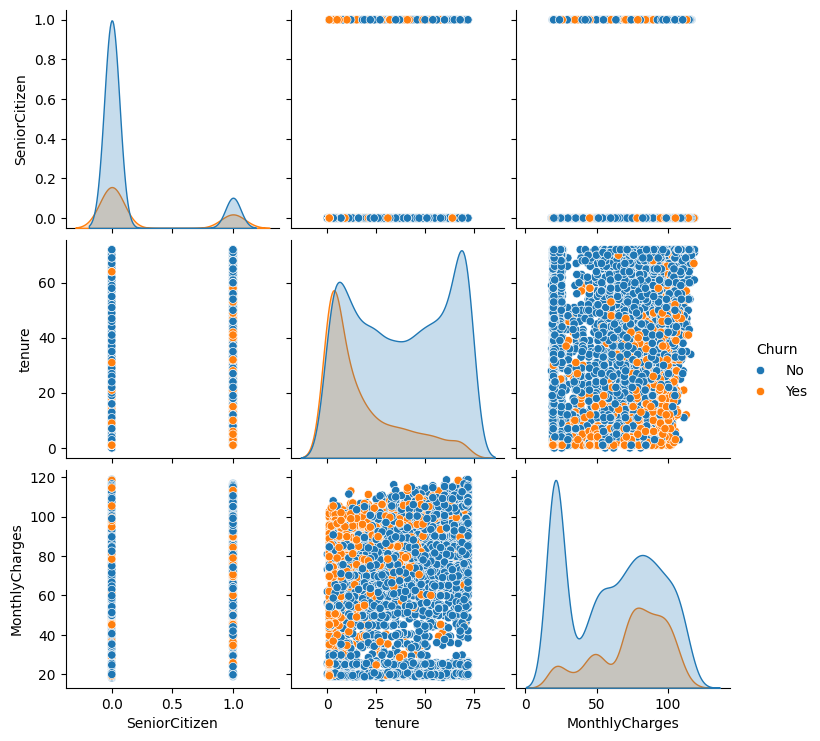

In [107]:
#used sns.pairplot() to plot relationships between all numeric features in the dataset
sns.pairplot(data = df_train, hue = 'Churn')

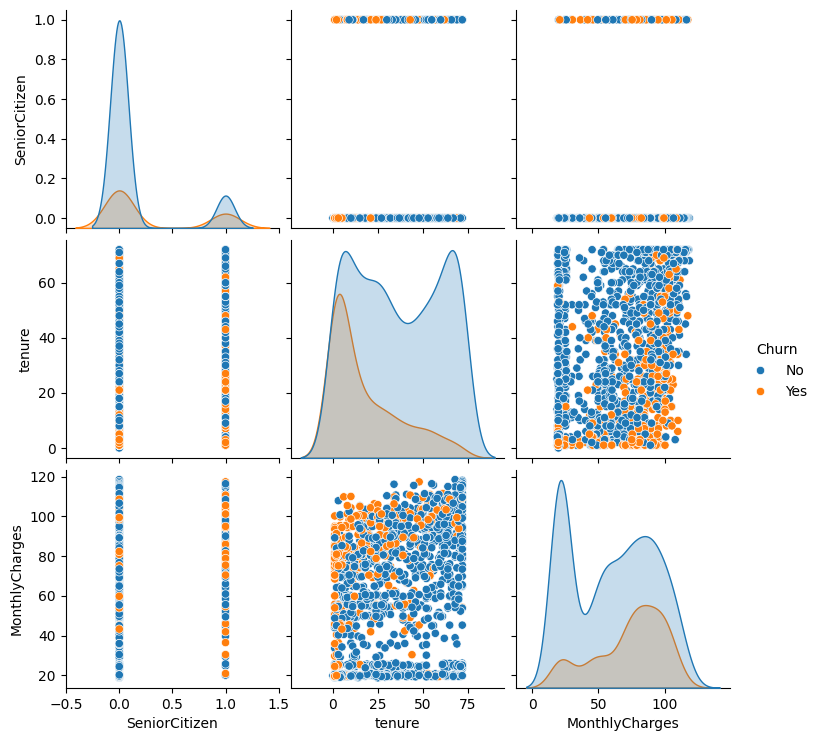

In [108]:
sns.pairplot(data = df_test, hue = 'Churn')

In [109]:
df_train_num = df_train.select_dtypes(include=['int64','float64'])
df_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,35,20.75
1,0,28,35.75
2,0,56,98.60
3,0,39,20.45
4,0,43,51.25


Visualize Correlation Matrix (Heatmap)

In [110]:
corr_matrix = df_train_num.corr()
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.022672,0.212889
tenure,0.022672,1.000000,0.241236
MonthlyCharges,0.212889,0.241236,1.000000


<Axes: >

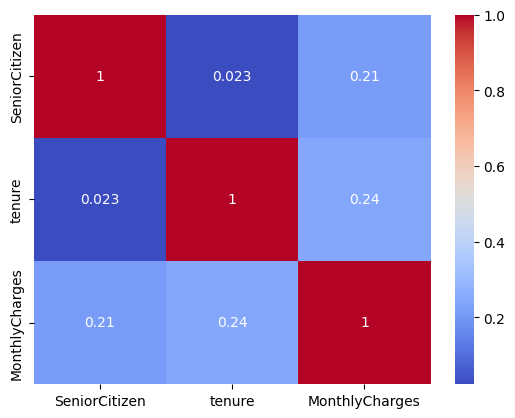

In [111]:
#heatmap of correalation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Data Preprocessing

## Missing values handling

In [112]:
df_train.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [113]:
df_train['gender']=df_train['gender'].fillna(df_train['gender'].mode()[0])

In [114]:
df_train['OnlineSecurity']=df_train['OnlineSecurity'].fillna(df_train['OnlineSecurity'].mode()[0])

In [115]:
df_train['MonthlyCharges']=df_train['MonthlyCharges'].fillna(df_train['MonthlyCharges'].mean())

In [116]:
df_train['TotalCharges']=df_train['TotalCharges'].fillna(df_train['TotalCharges'].mode()[0])

In [117]:
df_train.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Feature Engineering

In [118]:
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')

In [119]:
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'], errors='coerce')

In [120]:
# Convert Contract type to numeric (if needed)
df_train['Contract'] = df_train['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24})

# Create interaction feature
df_train['Tenure_Contract'] = df_train['tenure'] * df_train['Contract']

In [121]:
df_train['CLV'] = df_train['tenure'] * df_train['MonthlyCharges']

In [122]:
#Convert Contract type to numeric (if needed)
df_test['Contract'] = df_test['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24})

# Create interaction feature
df_test['Tenure_Contract'] = df_test['tenure'] * df_test['Contract']

In [123]:
df_test['CLV'] = df_test['tenure'] * df_test['MonthlyCharges']

## Scaling

In [124]:
min_scale = MinMaxScaler()
num_cols = ['SeniorCitizen','tenure',
   'MonthlyCharges',
   'TotalCharges']
df_train[num_cols] = min_scale.fit_transform(df_train[num_cols])
df_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Contract,CLV
0,9509-MPYOD,Female,0.0,No,No,0.486111,Yes,No,No,No internet service,...,No internet service,No internet service,12,No,Mailed check,0.024876,0.078653,No,420,726.25
1,7746-AWNQW,Female,0.0,No,No,0.388889,No,No phone service,DSL,No,...,No,No,1,Yes,Mailed check,0.174129,0.108765,No,28,1001.00
2,2208-UGTGR,Male,0.0,No,No,0.777778,Yes,Yes,Fiber optic,No,...,Yes,Yes,1,No,Electronic check,0.799502,0.641845,No,56,5521.60
3,4884-LEVMQ,Male,0.0,Yes,No,0.541667,Yes,No,No,No internet service,...,No internet service,No internet service,24,Yes,Bank transfer (automatic),0.021891,0.088986,No,936,797.55
4,6682-VCIXC,Female,0.0,Yes,Yes,0.597222,No,No phone service,DSL,No,...,Yes,No,12,Yes,Bank transfer (automatic),0.328358,0.246107,No,516,2203.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0.0,No,No,0.708333,Yes,No,Fiber optic,No,...,Yes,Yes,1,Yes,Electronic check,0.803483,0.579198,No,51,5049.00
5630,3908-MKIMJ,Male,1.0,Yes,No,0.944444,No,No phone service,DSL,Yes,...,No,No,24,Yes,Electronic check,0.235821,0.340055,No,1632,2852.60
5631,4277-BWBML,Male,0.0,Yes,Yes,1.000000,Yes,No,No,No internet service,...,No internet service,No internet service,24,No,Bank transfer (automatic),0.016915,0.150474,No,1728,1436.40
5632,9110-HSGTV,Female,0.0,No,No,0.958333,Yes,No,DSL,No,...,Yes,Yes,24,Yes,Credit card (automatic),0.638806,0.638874,No,1656,5689.05


In [125]:
min_scale = MinMaxScaler()
num_cols = ['SeniorCitizen','tenure',
   'MonthlyCharges','TotalCharges']
df_test[num_cols] = min_scale.fit_transform(df_test[num_cols])
df_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Contract,CLV
0,6080-TCMYC,Male,0.0,Yes,Yes,0.555556,Yes,Yes,Fiber optic,No,...,No,No,1,Yes,Electronic check,0.625626,0.383837,No,40,3248.00
1,7285-KLOTR,Female,0.0,Yes,No,0.166667,Yes,Yes,DSL,Yes,...,Yes,Yes,12,No,Electronic check,0.602102,0.100600,No,144,946.20
2,7486-KSRVI,Male,0.0,No,No,0.597222,Yes,Yes,Fiber optic,No,...,Yes,Yes,12,Yes,Electronic check,0.813814,0.491625,Yes,516,4300.00
3,9924-JPRMC,Male,0.0,No,No,1.000000,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,24,Yes,Electronic check,0.995996,1.000000,No,1728,8510.40
4,4439-YRNVD,Female,0.0,No,No,0.138889,No,No phone service,DSL,No,...,No,No,1,No,Electronic check,0.175676,0.041649,No,10,362.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2039-JONDJ,Male,0.0,No,No,0.375000,Yes,No,DSL,Yes,...,No,No,12,No,Bank transfer (automatic),0.367868,0.171059,No,324,1497.15
1405,2516-VQRRV,Female,1.0,No,No,0.027778,Yes,Yes,Fiber optic,No,...,No,No,1,Yes,Mailed check,0.568068,0.016369,Yes,2,150.90
1406,5570-PTWEH,Female,0.0,Yes,No,0.041667,Yes,Yes,Fiber optic,No,...,No,No,1,Yes,Credit card (automatic),0.565065,0.023211,Yes,3,225.45
1407,1722-LDZJS,Male,0.0,Yes,Yes,0.736111,Yes,No,No,No internet service,...,No internet service,No internet service,12,No,Credit card (automatic),0.015015,0.123043,No,636,1070.60


## Encoding Categorical values

In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   float64
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   float64
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   int64  
 16  PaperlessBilling  5634 non-null   object 


In [127]:
label_enc=LabelEncoder()
df_train['gender']=label_enc.fit_transform(df_train['gender'])
df_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Contract,CLV
0,9509-MPYOD,0,0.0,No,No,0.486111,Yes,No,No,No internet service,...,No internet service,No internet service,12,No,Mailed check,0.024876,0.078653,No,420,726.25
1,7746-AWNQW,0,0.0,No,No,0.388889,No,No phone service,DSL,No,...,No,No,1,Yes,Mailed check,0.174129,0.108765,No,28,1001.00
2,2208-UGTGR,1,0.0,No,No,0.777778,Yes,Yes,Fiber optic,No,...,Yes,Yes,1,No,Electronic check,0.799502,0.641845,No,56,5521.60
3,4884-LEVMQ,1,0.0,Yes,No,0.541667,Yes,No,No,No internet service,...,No internet service,No internet service,24,Yes,Bank transfer (automatic),0.021891,0.088986,No,936,797.55
4,6682-VCIXC,0,0.0,Yes,Yes,0.597222,No,No phone service,DSL,No,...,Yes,No,12,Yes,Bank transfer (automatic),0.328358,0.246107,No,516,2203.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,1,0.0,No,No,0.708333,Yes,No,Fiber optic,No,...,Yes,Yes,1,Yes,Electronic check,0.803483,0.579198,No,51,5049.00
5630,3908-MKIMJ,1,1.0,Yes,No,0.944444,No,No phone service,DSL,Yes,...,No,No,24,Yes,Electronic check,0.235821,0.340055,No,1632,2852.60
5631,4277-BWBML,1,0.0,Yes,Yes,1.000000,Yes,No,No,No internet service,...,No internet service,No internet service,24,No,Bank transfer (automatic),0.016915,0.150474,No,1728,1436.40
5632,9110-HSGTV,0,0.0,No,No,0.958333,Yes,No,DSL,No,...,Yes,Yes,24,Yes,Credit card (automatic),0.638806,0.638874,No,1656,5689.05


In [128]:
label_enc=LabelEncoder()
df_train['Partner']=label_enc.fit_transform(df_train['Partner'])

In [129]:
df_train['Dependents']=label_enc.fit_transform(df_train['Dependents'])

In [130]:
df_train['PhoneService']=label_enc.fit_transform(df_train['PhoneService'])

In [131]:
df_train['PaperlessBilling']=label_enc.fit_transform(df_train['PaperlessBilling'])

In [132]:
df_train['Churn']=label_enc.fit_transform(df_train['Churn'])
df_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Contract,CLV
0,9509-MPYOD,0,0.0,0,0,0.486111,1,No,No,No internet service,...,No internet service,No internet service,12,0,Mailed check,0.024876,0.078653,0,420,726.25
1,7746-AWNQW,0,0.0,0,0,0.388889,0,No phone service,DSL,No,...,No,No,1,1,Mailed check,0.174129,0.108765,0,28,1001.00
2,2208-UGTGR,1,0.0,0,0,0.777778,1,Yes,Fiber optic,No,...,Yes,Yes,1,0,Electronic check,0.799502,0.641845,0,56,5521.60
3,4884-LEVMQ,1,0.0,1,0,0.541667,1,No,No,No internet service,...,No internet service,No internet service,24,1,Bank transfer (automatic),0.021891,0.088986,0,936,797.55
4,6682-VCIXC,0,0.0,1,1,0.597222,0,No phone service,DSL,No,...,Yes,No,12,1,Bank transfer (automatic),0.328358,0.246107,0,516,2203.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,1,0.0,0,0,0.708333,1,No,Fiber optic,No,...,Yes,Yes,1,1,Electronic check,0.803483,0.579198,0,51,5049.00
5630,3908-MKIMJ,1,1.0,1,0,0.944444,0,No phone service,DSL,Yes,...,No,No,24,1,Electronic check,0.235821,0.340055,0,1632,2852.60
5631,4277-BWBML,1,0.0,1,1,1.000000,1,No,No,No internet service,...,No internet service,No internet service,24,0,Bank transfer (automatic),0.016915,0.150474,0,1728,1436.40
5632,9110-HSGTV,0,0.0,0,0,0.958333,1,No,DSL,No,...,Yes,Yes,24,1,Credit card (automatic),0.638806,0.638874,0,1656,5689.05


In [133]:
df_train= pd.get_dummies(df_train, columns = ['InternetService','Contract','PaymentMethod'],dtype=int,prefix=['Internetservice','Contract','Paymentmethod'])
df_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Internetservice_DSL,Internetservice_Fiber optic,Internetservice_No,Contract_1,Contract_12,Contract_24,Paymentmethod_Bank transfer (automatic),Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check
0,9509-MPYOD,0,0.0,0,0,0.486111,1,No,No internet service,No internet service,...,0,0,1,0,1,0,0,0,0,1
1,7746-AWNQW,0,0.0,0,0,0.388889,0,No phone service,No,No,...,1,0,0,1,0,0,0,0,0,1
2,2208-UGTGR,1,0.0,0,0,0.777778,1,Yes,No,Yes,...,0,1,0,1,0,0,0,0,1,0
3,4884-LEVMQ,1,0.0,1,0,0.541667,1,No,No internet service,No internet service,...,0,0,1,0,0,1,1,0,0,0
4,6682-VCIXC,0,0.0,1,1,0.597222,0,No phone service,No,Yes,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,1,0.0,0,0,0.708333,1,No,No,Yes,...,0,1,0,1,0,0,0,0,1,0
5630,3908-MKIMJ,1,1.0,1,0,0.944444,0,No phone service,Yes,Yes,...,1,0,0,0,0,1,0,0,1,0
5631,4277-BWBML,1,0.0,1,1,1.000000,1,No,No internet service,No internet service,...,0,0,1,0,0,1,1,0,0,0
5632,9110-HSGTV,0,0.0,0,0,0.958333,1,No,No,No,...,1,0,0,0,0,1,0,1,0,0


In [134]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               5634 non-null   object 
 1   gender                                   5634 non-null   int64  
 2   SeniorCitizen                            5634 non-null   float64
 3   Partner                                  5634 non-null   int64  
 4   Dependents                               5634 non-null   int64  
 5   tenure                                   5634 non-null   float64
 6   PhoneService                             5634 non-null   int64  
 7   MultipleLines                            5634 non-null   object 
 8   OnlineSecurity                           5634 non-null   object 
 9   OnlineBackup                             5634 non-null   object 
 10  DeviceProtection                         5634 no

In [135]:
df_train['MultipleLines'] = df_train['MultipleLines'].str.lower().map({'yes': 1, 'no': 0})
df_train['OnlineSecurity'] = df_train['OnlineSecurity'].str.lower().map({'yes': 1, 'no': 0})
df_train['OnlineBackup'] = df_train['OnlineBackup'].str.lower().map({'yes': 1, 'no': 0})
df_train['DeviceProtection'] = df_train['DeviceProtection'].str.lower().map({'yes': 1, 'no': 0})
df_train['TechSupport'] = df_train['TechSupport'].str.lower().map({'yes': 1, 'no': 0})
df_train['StreamingTV'] = df_train['StreamingTV'].str.lower().map({'yes': 1, 'no': 0})
df_train['StreamingMovies'] = df_train['StreamingMovies'].str.lower().map({'yes': 1, 'no': 0})

In [136]:
df_train.drop('customerID',axis=1,inplace=True)

In [137]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5634 non-null   int64  
 1   SeniorCitizen                            5634 non-null   float64
 2   Partner                                  5634 non-null   int64  
 3   Dependents                               5634 non-null   int64  
 4   tenure                                   5634 non-null   float64
 5   PhoneService                             5634 non-null   int64  
 6   MultipleLines                            5081 non-null   float64
 7   OnlineSecurity                           4463 non-null   float64
 8   OnlineBackup                             4431 non-null   float64
 9   DeviceProtection                         4431 non-null   float64
 10  TechSupport                              4431 no

In [138]:
df_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Internetservice_DSL,Internetservice_Fiber optic,Internetservice_No,Contract_1,Contract_12,Contract_24,Paymentmethod_Bank transfer (automatic),Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check
0,0,0.0,0,0,0.486111,1,0.0,NaN,NaN,NaN,...,0,0,1,0,1,0,0,0,0,1
1,0,0.0,0,0,0.388889,0,NaN,0.0,0.0,1.0,...,1,0,0,1,0,0,0,0,0,1
2,1,0.0,0,0,0.777778,1,1.0,0.0,1.0,0.0,...,0,1,0,1,0,0,0,0,1,0
3,1,0.0,1,0,0.541667,1,0.0,NaN,NaN,NaN,...,0,0,1,0,0,1,1,0,0,0
4,0,0.0,1,1,0.597222,0,NaN,0.0,1.0,0.0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1,0.0,0,0,0.708333,1,0.0,0.0,1.0,1.0,...,0,1,0,1,0,0,0,0,1,0
5630,1,1.0,1,0,0.944444,0,NaN,1.0,1.0,1.0,...,1,0,0,0,0,1,0,0,1,0
5631,1,0.0,1,1,1.000000,1,0.0,NaN,NaN,NaN,...,0,0,1,0,0,1,1,0,0,0
5632,0,0.0,0,0,0.958333,1,0.0,0.0,0.0,1.0,...,1,0,0,0,0,1,0,1,0,0


In [139]:
df_train.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,553
OnlineSecurity,1171
OnlineBackup,1203
DeviceProtection,1203


In [140]:
df_train = df_train.apply(pd.to_numeric, errors='coerce')

columns_to_impute_mode = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in columns_to_impute_mode:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

df_train['TotalCharges']=df_train['TotalCharges'].fillna(df_train['TotalCharges'].median())

In [141]:
df_train.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [142]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   float64
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   float64
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   int64  
 16  PaperlessBilling  1409 non-null   object 


In [143]:
label_enc=LabelEncoder()
df_test['Partner']=label_enc.fit_transform(df_test['Partner'])

In [144]:
df_test['gender']=label_enc.fit_transform(df_test['gender'])

In [145]:
df_test['Dependents']=label_enc.fit_transform(df_test['Dependents'])

In [146]:
df_test['PhoneService']=label_enc.fit_transform(df_test['PhoneService'])

In [147]:
df_test['PaperlessBilling']=label_enc.fit_transform(df_test['PaperlessBilling'])

In [148]:
df_test['Churn']=label_enc.fit_transform(df_test['Churn'])

In [149]:
df_test= pd.get_dummies(df_test, columns = ['InternetService','Contract','PaymentMethod'],dtype=int,prefix=['Internetservice','Contract','Paymentmethod'])

In [150]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               1409 non-null   object 
 1   gender                                   1409 non-null   int64  
 2   SeniorCitizen                            1409 non-null   float64
 3   Partner                                  1409 non-null   int64  
 4   Dependents                               1409 non-null   int64  
 5   tenure                                   1409 non-null   float64
 6   PhoneService                             1409 non-null   int64  
 7   MultipleLines                            1409 non-null   object 
 8   OnlineSecurity                           1409 non-null   object 
 9   OnlineBackup                             1409 non-null   object 
 10  DeviceProtection                         1409 no

In [151]:
df_test['MultipleLines'] = df_test['MultipleLines'].str.lower().map({'yes': 1, 'no': 0})
df_test['OnlineSecurity'] = df_test['OnlineSecurity'].str.lower().map({'yes': 1, 'no': 0})
df_test['OnlineBackup'] = df_test['OnlineBackup'].str.lower().map({'yes': 1, 'no': 0})
df_test['DeviceProtection'] = df_test['DeviceProtection'].str.lower().map({'yes': 1, 'no': 0})
df_test['TechSupport'] = df_test['TechSupport'].str.lower().map({'yes': 1, 'no': 0})
df_test['StreamingTV'] = df_test['StreamingTV'].str.lower().map({'yes': 1, 'no': 0})
df_test['StreamingMovies'] = df_test['StreamingMovies'].str.lower().map({'yes': 1, 'no': 0})

In [152]:
df_test.drop('customerID',axis=1,inplace=True)

In [153]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   1409 non-null   int64  
 1   SeniorCitizen                            1409 non-null   float64
 2   Partner                                  1409 non-null   int64  
 3   Dependents                               1409 non-null   int64  
 4   tenure                                   1409 non-null   float64
 5   PhoneService                             1409 non-null   int64  
 6   MultipleLines                            1280 non-null   float64
 7   OnlineSecurity                           1086 non-null   float64
 8   OnlineBackup                             1086 non-null   float64
 9   DeviceProtection                         1086 non-null   float64
 10  TechSupport                              1086 no

In [154]:
df_test.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,129
OnlineSecurity,323
OnlineBackup,323
DeviceProtection,323


In [155]:
df_test = df_test.apply(pd.to_numeric, errors='coerce')

columns_to_impute_mode = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in columns_to_impute_mode:
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

df_test['TotalCharges']=df_test['TotalCharges'].fillna(df_test['TotalCharges'].median())

In [156]:
df_test.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


# Model Building

In [157]:
X_train = df_train.drop('Churn', axis=1)
y_train = df_train['Churn']

X_test = df_test.drop('Churn', axis=1)
y_test = df_test['Churn']

# Convert TotalCharges to numeric, coercing errors to NaN
X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')

# Impute missing values in TotalCharges column in X_train with the median
X_train['TotalCharges'] = X_train['TotalCharges'].fillna(X_train['TotalCharges'].median())

In [158]:
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier()
svm_model = SVC(probability=True)

In [159]:
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(probability=True)

# Model Evaluation

In [160]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n📌 Evaluation for {name}")
    print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision : {precision_score(y_test, y_pred):.4f}")
    print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score  : {f1_score(y_test, y_pred):.4f}")


# Evaluate each
evaluate_model(log_model, "Logistic Regression")
evaluate_model(rf_model, "Random Forest")
evaluate_model(svm_model, "Support Vector Machine")



📌 Evaluation for Logistic Regression
Accuracy  : 0.8183
Precision : 0.6811
Recall    : 0.5616
F1 Score  : 0.6156

📌 Evaluation for Random Forest
Accuracy  : 0.7892
Precision : 0.6164
Recall    : 0.4932
F1 Score  : 0.5479

📌 Evaluation for Support Vector Machine
Accuracy  : 0.7410
Precision : 0.0000
Recall    : 0.0000
F1 Score  : 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Tuning

Fine tuning with Randomized search cv

In [161]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}



Model implementation with RandomForestClassifier

In [162]:
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,             # number of random combinations to try
    cv=5,                  # 5-fold cross-validation
    scoring='f1',          # or 'roc_auc' depending on your goal
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='f1', verbose=1)

In [163]:
print(" Best Parameters:")
print(random_search.best_params_)

best_rf = random_search.best_estimator_


 Best Parameters:
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'bootstrap': True}


In [164]:
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("Evaluation Metrics (After Tuning):")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))

Evaluation Metrics (After Tuning):
Accuracy : 0.8019872249822569
F1 Score : 0.5714285714285714
Precision: 0.6503496503496503
Recall   : 0.5095890410958904


#Bagging

In [166]:
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

print("📌 Bagging Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

📌 Bagging Results:
Accuracy: 0.7764371894960965
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1044
           1       0.59      0.47      0.52       365

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409



#Boosting

In [168]:
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)

print("\n📌 AdaBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))


📌 AdaBoost Results:
Accuracy: 0.8090844570617459
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1044
           1       0.67      0.53      0.59       365

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



gradient boosting

In [169]:
gradboost = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
gradboost.fit(X_train, y_train)
y_pred_gb = gradboost.predict(X_test)

print("\n📌 Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))



📌 Gradient Boosting Results:
Accuracy: 0.8062455642299503
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1044
           1       0.65      0.55      0.59       365

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



#Cross validation

In [170]:
models = {
    "Bagging": bagging,
    "AdaBoost": adaboost,
    "GradientBoost": gradboost
}

print("\n📌 Cross Validation (5-fold):")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f"{name}: Mean CV Accuracy = {scores.mean():.4f} (+/- {scores.std():.4f})")


📌 Cross Validation (5-fold):
Bagging: Mean CV Accuracy = 0.7792 (+/- 0.0101)
AdaBoost: Mean CV Accuracy = 0.8005 (+/- 0.0072)
GradientBoost: Mean CV Accuracy = 0.7977 (+/- 0.0058)
